<a href="https://colab.research.google.com/github/lykos007/MachineLearningSongRecommender/blob/main/ClusterSongs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.8 M

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('rolling_stones_spotify.csv')

In [ ]:
data.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [ ]:
data.shape

(1610, 18)

In [ ]:
# Display the columns and their data types
print(data.dtypes)


Unnamed: 0            int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object


In [ ]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [ ]:
# Display the columns and their data types
print(data.dtypes)


Unnamed: 0                   int64
name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
id                          object
uri                         object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object


In [ ]:
data_with_nulls = data[data.isnull().any(axis=1)]

# Display the rows with at least one null value
print(data_with_nulls)

Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []


There are no rows containing null characters


In [ ]:

sorted_data = data.sort_values(by='album')
sorted_data.head()

Unnamed: 0                                       name   album  \
1573        1573                                    Susie Q  12 X 5   
1571        1571                             Grown Up Wrong  12 X 5   
1570        1570             Congratulations - Mono Version  12 X 5   
1569        1569                        Under The Boardwalk  12 X 5   
1568        1568  2120 South Michigan Avenue - Long Version  12 X 5   

     release_date  track_number                      id  \
1573   1964-10-17            12  52A8QH0MF14J9gcJbN1tIt   
1571   1964-10-17            10  5OdKIhgMxlgw2octxDSRow   
1570   1964-10-17             9  1Uo1CbXqtNJfz6JAcaWxPE   
1569   1964-10-17             8  2JDgTnSv5JU4brzsNtITi8   
1568   1964-10-17             7  4KoBKbnRh4BywqvY5VPkts   

                                       uri  acousticness  danceability  \
1573  spotify:track:52A8QH0MF14J9gcJbN1tIt       0.03330         0.506   
1571  spotify:track:5OdKIhgMxlgw2octxDSRow       0.12300         0.525   
1570  spotify:track:1Uo1CbXqtNJfz6JAcaWxPE       0.16000         0.394   
1569  spotify:track:2JDgTnSv5JU4brzsNtITi8       0.64400         0.703   
1568  spotify:track:4KoBKbnRh4BywqvY5VPkts       0.00137         0.609   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
1573   0.762          0.690000    0.2110    -9.059       0.0345   80.840   
1571   0.550          0.000058    0.2730    -9.432       0.0397  159.608   
1570   0.562          0.021100    0.1870    -9.301       0.0914  197.401   
1569   0.492          0.000000    0.2650   -10.085       0.0349  119.034   
1568   0.585          0.876000    0.0819   -13.173       0.0305  147.176   

      valence  popularity  duration_ms  
1573    0.967          32       110986  
1571    0.336          24       125533  
1570    0.660          27       148773  
1569    0.593          35       166520  
1568    0.825          28       218466

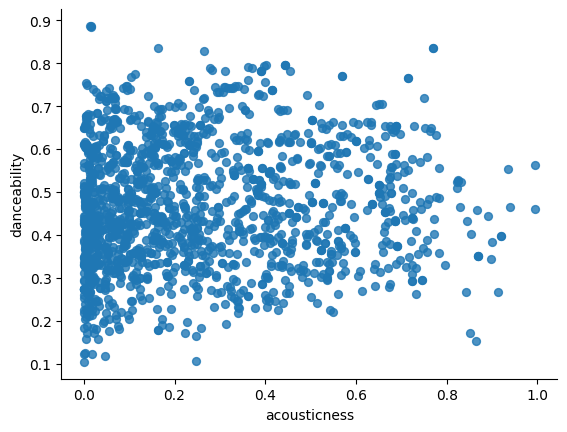

In [ ]:
# @title acousticness vs danceability

from matplotlib import pyplot as plt
sorted_data.plot(kind='scatter', x='acousticness', y='danceability', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

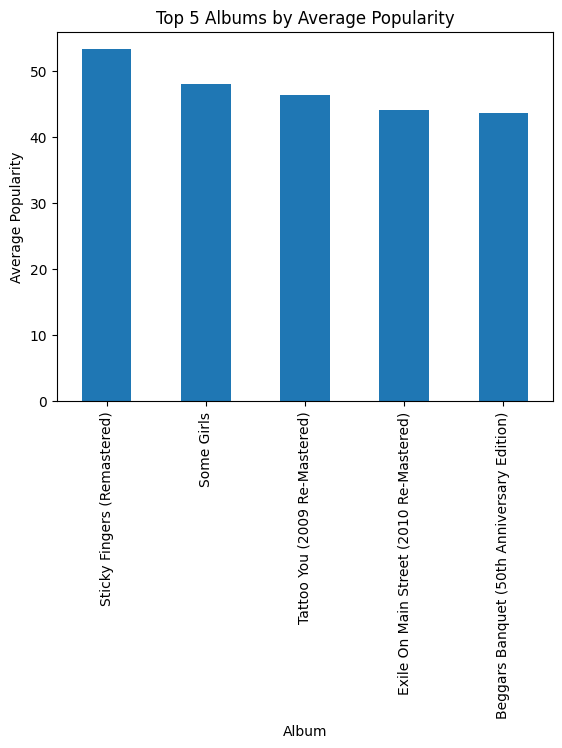

In [ ]:
# Calculate the average of 'popularity' field grouped by 'album' field and sort in descending order
avg_by_album_sorted = data.groupby('album')['popularity'].mean().sort_values(ascending=False)

# Select only the top 5 albums
top_5_albums_avg = avg_by_album_sorted.head(5)

import matplotlib.pyplot as plt

# Plotting
top_5_albums_avg.plot(kind='bar')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.title('Top 5 Albums by Average Popularity')
plt.show()

The

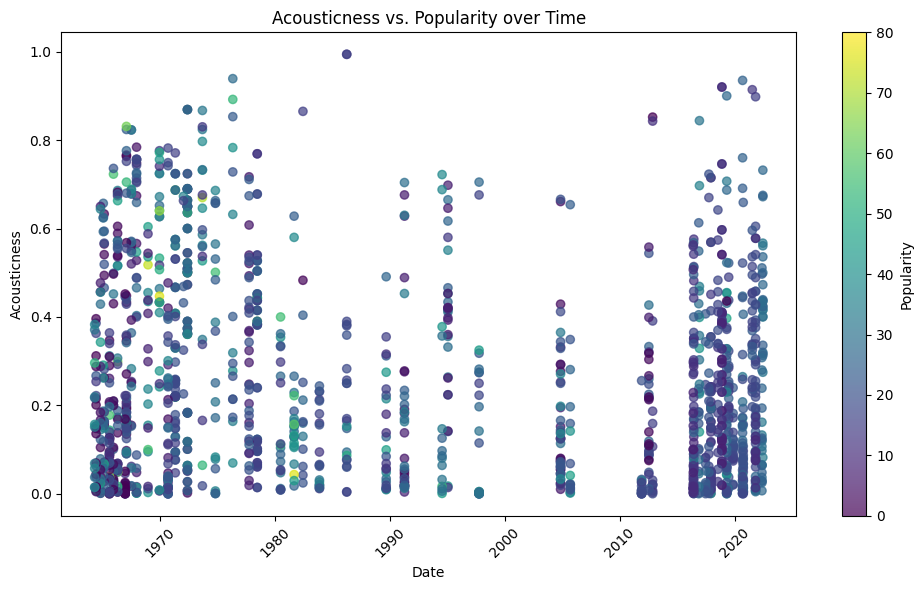

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['release_date'], data['acousticness'], c=data['popularity'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Popularity')
plt.xlabel('Date')
plt.ylabel('Acousticness')
plt.title('Acousticness vs. Popularity over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

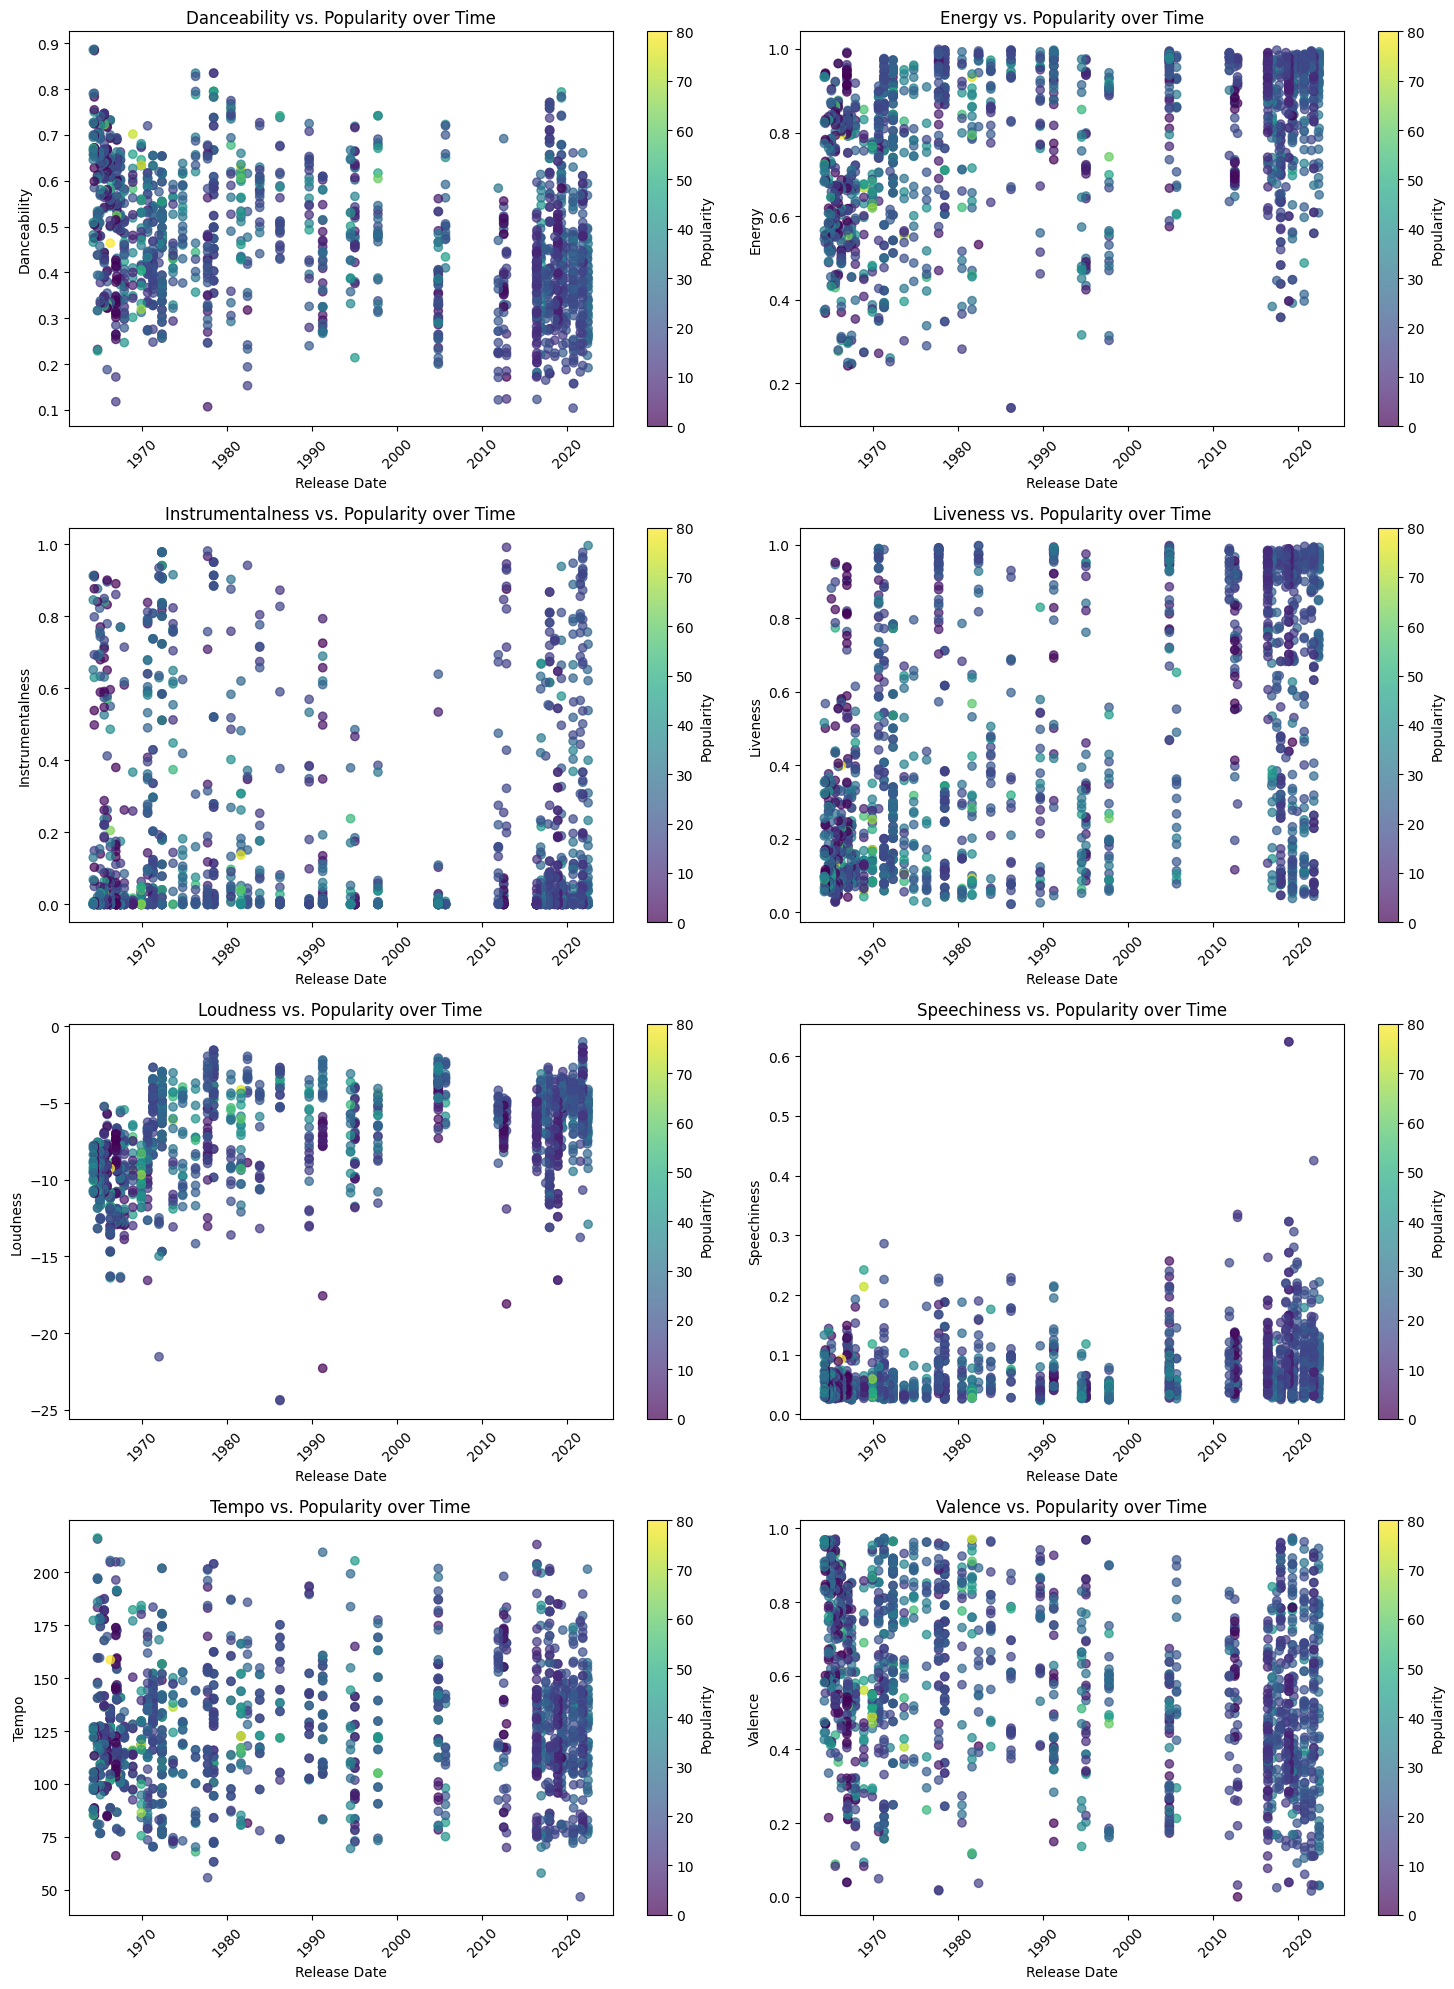

In [ ]:
# Attributes to plot
attributes = ['danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Plotting
plt.figure(figsize=(15, 20))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(4, 2, i)
    plt.scatter(data['release_date'], data[attribute], c=data['popularity'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Popularity')
    plt.xlabel('Release Date')
    plt.ylabel(attribute.capitalize())  # Capitalize the attribute name for better readability
    plt.title(f'{attribute.capitalize()} vs. Popularity over Time')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
data_sorted_by_date = data.sort_values(by='release_date')
data_sorted_by_date.head()

Unnamed: 0                                            name  \
1609        1609                                 Walking The Dog   
1598        1598                                        Route 66   
1599        1599  I Just Want To Make Love To You - Mono Version   
1600        1600                                     Honest I Do   
1601        1601                          Mona (I Need You Baby)   

                   album release_date  track_number                      id  \
1609  The Rolling Stones   1964-04-16            12  43SkTJJ2xleDaeiE4TIM70   
1598  The Rolling Stones   1964-04-16             1  1FRP8d6l2jm3DS5f78ZrhK   
1599  The Rolling Stones   1964-04-16             2  7j96wehhMtN0fkVvFhD8Ix   
1600  The Rolling Stones   1964-04-16             3  22Bvku5X3odiXj2wbtgY4T   
1601  The Rolling Stones   1964-04-16             4  1o2wswWx1RkkNuVp6Z21HC   

                                       uri  acousticness  danceability  \
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   
1598  spotify:track:1FRP8d6l2jm3DS5f78ZrhK        0.2960         0.671   
1599  spotify:track:7j96wehhMtN0fkVvFhD8Ix        0.2190         0.657   
1600  spotify:track:22Bvku5X3odiXj2wbtgY4T        0.1510         0.646   
1601  spotify:track:1o2wswWx1RkkNuVp6Z21HC        0.0688         0.695   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   
1598   0.725          0.000220    0.0889   -10.065       0.0650   85.270   
1599   0.825          0.845000    0.3540    -8.940       0.0980  126.817   
1600   0.374          0.651000    0.2080   -10.706       0.1030   87.593   
1601   0.684          0.000257    0.0981    -9.968       0.1330   99.014   

      valence  popularity  duration_ms  
1609    0.969          35       189186  
1598    0.956          51       140400  
1599    0.582          34       137666  
1600    0.475          31       129800  
1601    0.427          33       214693

In [ ]:
# Normalize the data in the specified columns using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = ['danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

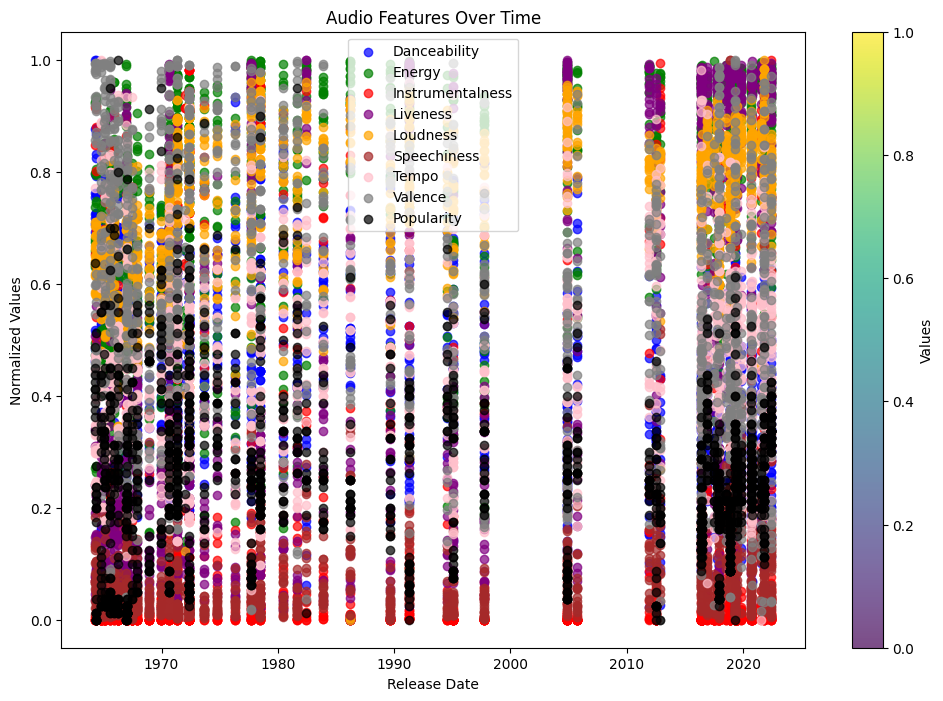

In [ ]:
# Normalize the data in the specified columns using Min-Max scaling
scaler = MinMaxScaler()
cols_to_normalize = ['danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

# Plotting
plt.figure(figsize=(12, 8))

plt.scatter(data['release_date'], data['danceability'], c='blue', label='Danceability', alpha=0.7)
plt.scatter(data['release_date'], data['energy'], c='green', label='Energy', alpha=0.7)
plt.scatter(data['release_date'], data['instrumentalness'], c='red', label='Instrumentalness', alpha=0.7)
plt.scatter(data['release_date'], data['liveness'], c='purple', label='Liveness', alpha=0.7)
plt.scatter(data['release_date'], data['loudness'], c='orange', label='Loudness', alpha=0.7)
plt.scatter(data['release_date'], data['speechiness'], c='brown', label='Speechiness', alpha=0.7)
plt.scatter(data['release_date'], data['tempo'], c='pink', label='Tempo', alpha=0.7)
plt.scatter(data['release_date'], data['valence'], c='gray', label='Valence', alpha=0.7)
plt.scatter(data['release_date'], data['popularity'], c='black', label='Popularity', alpha=0.7)

plt.colorbar(label='Values')
plt.xlabel('Release Date')
plt.ylabel('Normalized Values')
plt.title('Audio Features Over Time')
plt.legend()

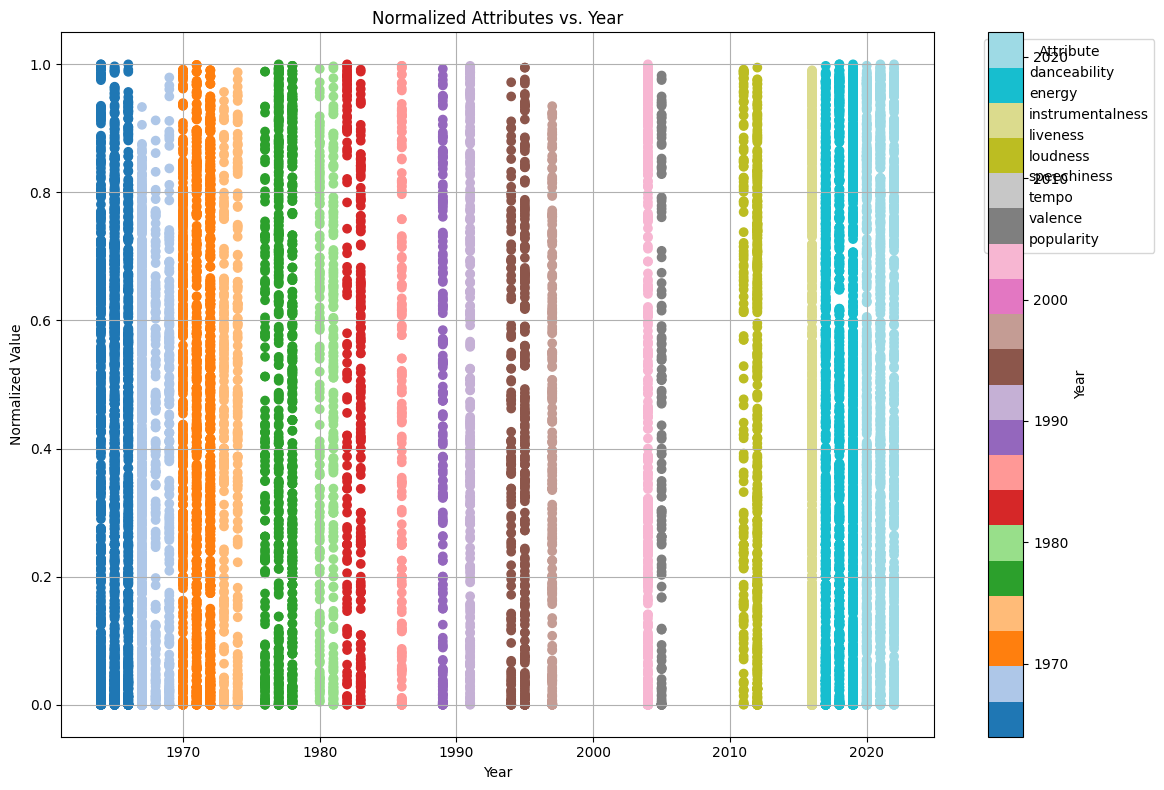

In [ ]:
# Group the data by year
data['year'] = data['release_date'].dt.year

# Plotting
plt.figure(figsize=(12, 8))

# Define a color map for years
cmap = plt.get_cmap('tab20')

# Plot each attribute with a different color
for i, attribute in enumerate(cols_to_normalize):
    plt.scatter(data['year'], data[attribute], label=attribute, c=data['year'], cmap=cmap)

plt.colorbar(label='Year')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Normalized Attributes vs. Year')
plt.legend(title='Attribute', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-18-073b0277302a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_data = data.groupby('year').mean()


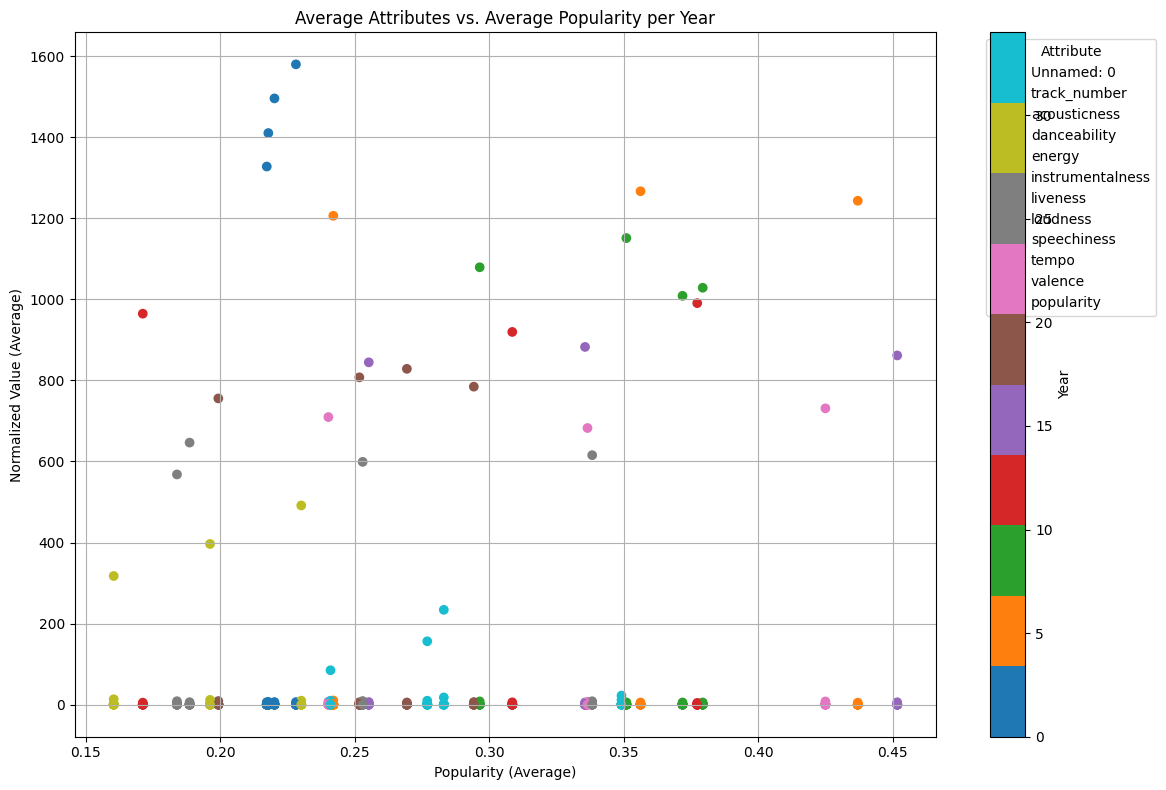

In [ ]:
# Group the data by year and calculate the average for each attribute
data['year'] = data['release_date'].dt.year
avg_data = data.groupby('year').mean()

# Plotting
plt.figure(figsize=(12, 8))

# Define a color map for attributes
cmap = plt.get_cmap('tab10')

# Plot each attribute with a different color
for i, attribute in enumerate(avg_data.columns[:-1]):  # Exclude 'popularity' from the plot
    plt.scatter(avg_data['popularity'], avg_data[attribute], label=attribute, c=range(len(avg_data)), cmap=cmap)

plt.colorbar(label='Year')
plt.xlabel('Popularity (Average)')
plt.ylabel('Normalized Value (Average)')
plt.title('Average Attributes vs. Average Popularity per Year')
plt.legend(title='Attribute', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-19-2f26eec58aa3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['popularity'].abs().sort_values(ascending=False)


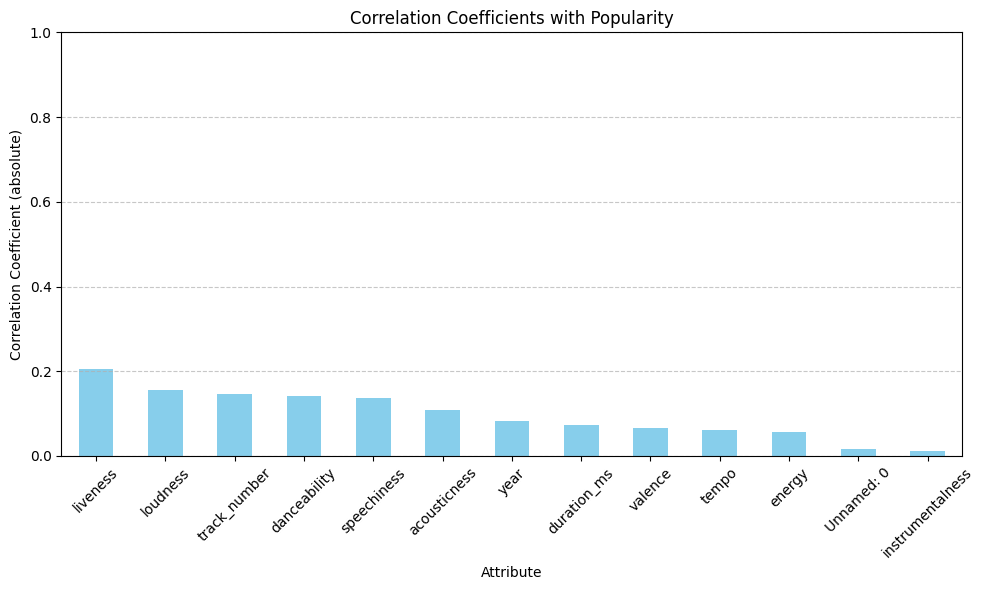

In [ ]:
# Calculate the correlation coefficients
correlations = data.corr()['popularity'].abs().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
correlations.drop('popularity').plot(kind='bar', color='skyblue')
plt.xlabel('Attribute')
plt.ylabel('Correlation Coefficient (absolute)')
plt.title('Correlation Coefficients with Popularity')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for correlation coefficients
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation coefficients
correlations = data.corr()['popularity'].abs().sort_values(ascending=False)

# Get the attribute with the highest correlation to 'popularity'
most_correlated_attribute = correlations.index[1]  # Index 0 is 'popularity' itself

print(f"The attribute most correlated to 'popularity' is: {most_correlated_attribute} with a correlation coefficient of {correlations[1]}")

The attribute most correlated to 'popularity' is: liveness with a correlation coefficient of 0.2058453263121548


<ipython-input-20-c3c5fd6bcd11>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()['popularity'].abs().sort_values(ascending=False)


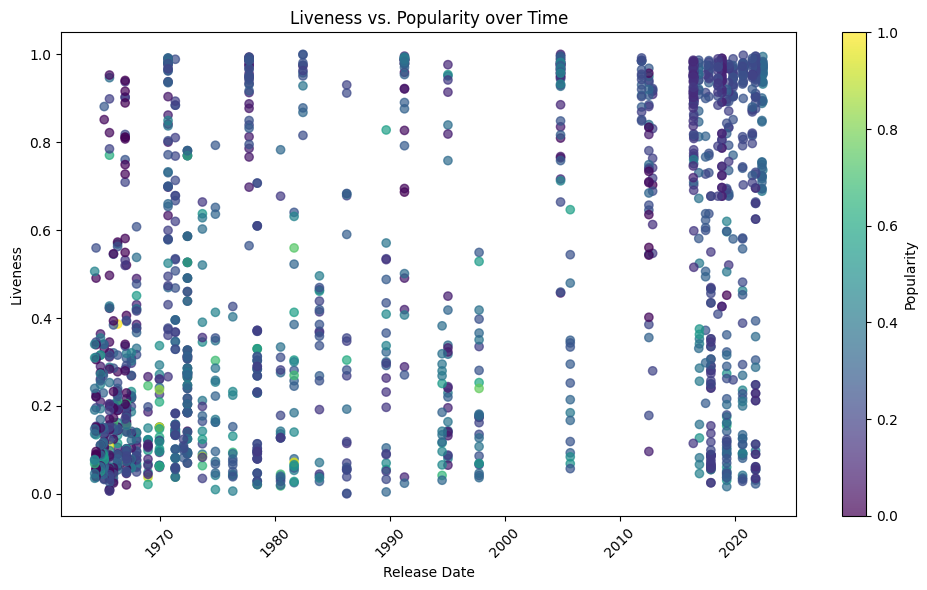

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['release_date'], data['liveness'], c=data['popularity'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Popularity')
plt.xlabel('Release Date')
plt.ylabel('Liveness')
plt.title('Liveness vs. Popularity over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from pycaret.clustering import *

In [ ]:
setup(data)

In [ ]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

In [ ]:
kmeans = create_model('kmeans', num_clusters=6)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
ap = create_model('ap')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
birch = create_model('birch')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
kmeans_df = assign_model(kmeans)

In [ ]:
kmeans_df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness       tempo  valence  popularity  duration_ms    Cluster  
0       0.1100  118.000999   0.0302          33        48640  Cluster 2  
1       0.0759  131.455002   0.3180          34       253173  Cluster 5  
2       0.1150  130.065994   0.3130          34       263160  Cluster 5  
3       0.1930  132.994003   0.1470          32       305880  Cluster 4  
4       0.0930  130.533005   0.2060          32       305106  Cluster 4

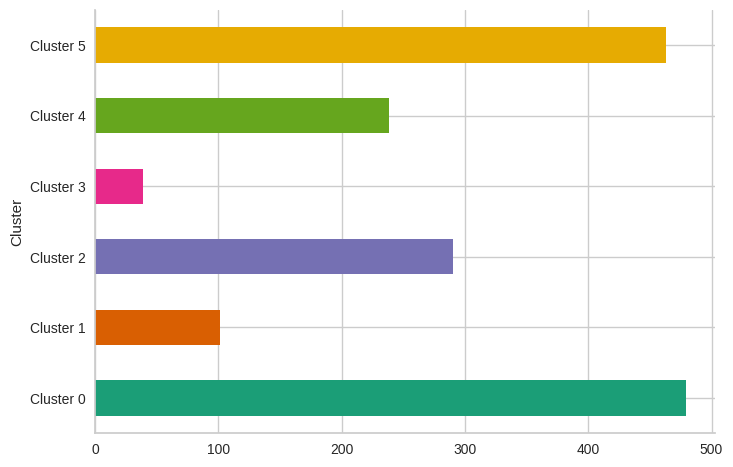

In [ ]:
# @title Cluster

from matplotlib import pyplot as plt
import seaborn as sns
kmeans_df.groupby('Cluster').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(kmeans_df.dtypes)

Unnamed: 0                   int32
name                      category
album                     category
release_date        datetime64[ns]
track_number                  int8
id                        category
uri                       category
acousticness               float32
danceability               float32
energy                     float32
instrumentalness           float32
liveness                   float32
loudness                   float32
speechiness                float32
tempo                      float32
valence                    float32
popularity                    int8
duration_ms                  int32
Cluster                     object
dtype: object


In [ ]:
kmeans_df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness       tempo  valence  popularity  duration_ms    Cluster  
0       0.1100  118.000999   0.0302          33        48640  Cluster 2  
1       0.0759  131.455002   0.3180          34       253173  Cluster 5  
2       0.1150  130.065994   0.3130          34       263160  Cluster 5  
3       0.1930  132.994003   0.1470          32       305880  Cluster 4  
4       0.0930  130.533005   0.2060          32       305106  Cluster 4

In [ ]:
# Get cluster assignments
cluster_assignments = kmeans.labels_

# Add cluster assignments to DataFrame
data['Cluster'] = cluster_assignments

# Calculate correlation between each attribute and the cluster assignments
correlations = {}
for attribute in data.select_dtypes(include=['number']).drop(columns=['Cluster', 'duration_ms']).columns:
    correlation = data[attribute].corr(data['Cluster'])
    correlations[attribute] = correlation

# Find the attribute most correlated with each cluster
most_correlated_attributes = {}
for cluster in range(kmeans.n_clusters):
    attributes_for_cluster = {k: v for k, v in correlations.items() if data[data['Cluster'] == cluster][k].any()}
    most_correlated_attribute = max(attributes_for_cluster, key=attributes_for_cluster.get)
    most_correlated_attributes[cluster] = most_correlated_attribute

# Print the result
for cluster, attribute in most_correlated_attributes.items():
    print(f"Cluster {cluster} is most closely correlated with attribute '{attribute}'")

Cluster 0 is most closely correlated with attribute 'liveness'
Cluster 1 is most closely correlated with attribute 'liveness'
Cluster 2 is most closely correlated with attribute 'liveness'
Cluster 3 is most closely correlated with attribute 'liveness'
Cluster 4 is most closely correlated with attribute 'liveness'
Cluster 5 is most closely correlated with attribute 'liveness'


In [ ]:
# Get cluster assignments
cluster_assignments = kmeans.labels_

# Add cluster assignments to DataFrame
data['Cluster'] = cluster_assignments

# Calculate correlation between each attribute and the cluster assignments
correlations = {}
for attribute in data.select_dtypes(include=['number']).drop(columns=['Cluster', 'duration_ms']).columns:
    correlation = data[attribute].corr(data['Cluster'])
    correlations[attribute] = correlation

# Find the top two correlated attributes per cluster
top_correlated_attributes = {}
for cluster in range(kmeans.n_clusters):
    attributes_for_cluster = {k: v for k, v in correlations.items() if data[data['Cluster'] == cluster][k].any()}
    top_attributes = sorted(attributes_for_cluster, key=attributes_for_cluster.get, reverse=True)[:2]
    top_correlated_attributes[cluster] = top_attributes

# Print the result
for cluster, attributes in top_correlated_attributes.items():
    print(f"Cluster {cluster}: {attributes}")

Cluster 0: ['liveness', 'loudness']
Cluster 1: ['liveness', 'loudness']
Cluster 2: ['liveness', 'loudness']
Cluster 3: ['liveness', 'loudness']
Cluster 4: ['liveness', 'loudness']
Cluster 5: ['liveness', 'loudness']


In [ ]:
# Group by 'Cluster' and calculate the average 'liveness' for each cluster
average_liveness = data.groupby('Cluster')['liveness'].mean()

# Sort the result in ascending order
average_liveness_sorted = average_liveness.sort_values()

# Print the result
print("Average liveliness per cluster (ascending order):")
for cluster, avg_liveness in average_liveness_sorted.items():
    print(f"Cluster {cluster}: {avg_liveness}")

Average liveliness per cluster (ascending order):
Cluster 2: 0.32487344827586206
Cluster 0: 0.422884133611691
Cluster 5: 0.56294686825054
Cluster 4: 0.563977731092437
Cluster 1: 0.6857405940594059
Cluster 3: 0.7892051282051282


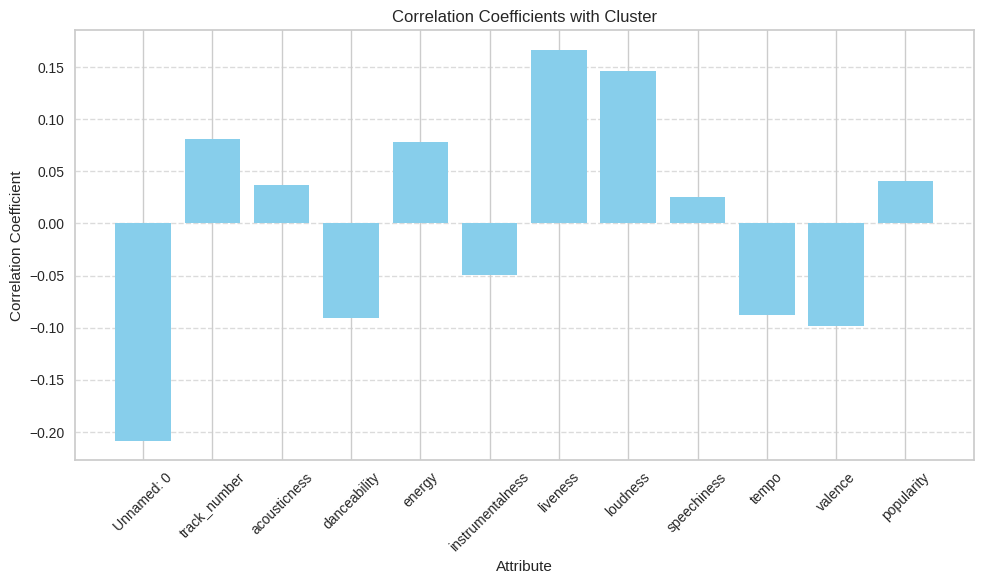

In [ ]:
# Get cluster assignments
cluster_assignments = kmeans.labels_

# Add cluster assignments to DataFrame
data['Cluster'] = cluster_assignments

# Calculate correlation between each attribute and the cluster assignments
correlations = {}
for attribute in data.select_dtypes(include=['number']).drop(columns=['Cluster', 'duration_ms']).columns:
    correlation = data[attribute].corr(data['Cluster'])
    correlations[attribute] = correlation

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.xlabel('Attribute')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients with Cluster')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The clusters were primarily grouped by liveliness.  Followed closely by loudness.  Valence was not a factor